In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

In [2]:
sample_df = pd.read_excel(r"C:\Users\bbrown\OneDrive - Green Assets\Desktop\jenks_experiment.xlsx", sheet_name='Sampled_Stand_Strata')

In [3]:
sample_df = sample_df.loc[sample_df['Strata'].str.contains("P")].copy()

<Axes: >

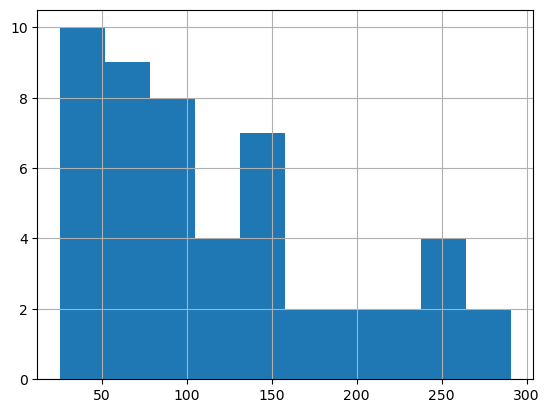

In [4]:
sample_df['Average MtCO2e/ac.'].hist()

In [5]:
sample = sample_df['Average MtCO2e/ac.'].to_numpy()
sample

array([ 25.29255045,  25.8817371 ,  28.50617229,  32.98312806,
        39.01176101,  40.07470589,  43.99159652,  45.72181124,
        48.67935364,  49.73709075,  57.87656545,  63.03934799,
        65.20817254,  65.98273941,  68.66197247,  69.96713833,
        74.72145256,  77.42829824,  77.75057971,  80.07227165,
        80.81844294,  91.22653724,  95.30061144, 100.77825894,
       101.38431736, 104.0587903 , 104.84557459, 105.01810823,
       105.04496932, 108.38611804, 116.34748059, 132.6869597 ,
       136.26357843, 136.95384694, 143.08974527, 143.8204643 ,
       154.64640215, 155.58542388, 160.19231263, 174.9745268 ,
       190.25958103, 200.6746695 , 235.13899919, 237.31836917,
       241.96588422, 252.38220981, 252.8640172 , 261.94557924,
       287.20033209, 290.80753668])

In [7]:
kde = gaussian_kde(sample)

In [8]:
x_range = np.linspace(min(sample), max(sample), 1000)
kde_values = kde(x_range)

In [9]:
kde_values

array([0.00337461, 0.00339432, 0.003414  , 0.00343367, 0.00345333,
       0.00347297, 0.00349258, 0.00351218, 0.00353176, 0.00355131,
       0.00357084, 0.00359034, 0.00360982, 0.00362926, 0.00364868,
       0.00366807, 0.00368742, 0.00370675, 0.00372604, 0.00374529,
       0.0037645 , 0.00378368, 0.00380282, 0.00382191, 0.00384097,
       0.00385998, 0.00387895, 0.00389787, 0.00391674, 0.00393557,
       0.00395435, 0.00397308, 0.00399175, 0.00401037, 0.00402894,
       0.00404746, 0.00406591, 0.00408431, 0.00410265, 0.00412093,
       0.00413915, 0.00415731, 0.0041754 , 0.00419343, 0.0042114 ,
       0.00422929, 0.00424712, 0.00426488, 0.00428257, 0.00430019,
       0.00431774, 0.00433521, 0.00435261, 0.00436993, 0.00438718,
       0.00440435, 0.00442144, 0.00443845, 0.00445538, 0.00447223,
       0.00448899, 0.00450567, 0.00452227, 0.00453878, 0.00455521,
       0.00457154, 0.00458779, 0.00460395, 0.00462002, 0.00463599,
       0.00465188, 0.00466767, 0.00468337, 0.00469897, 0.00471

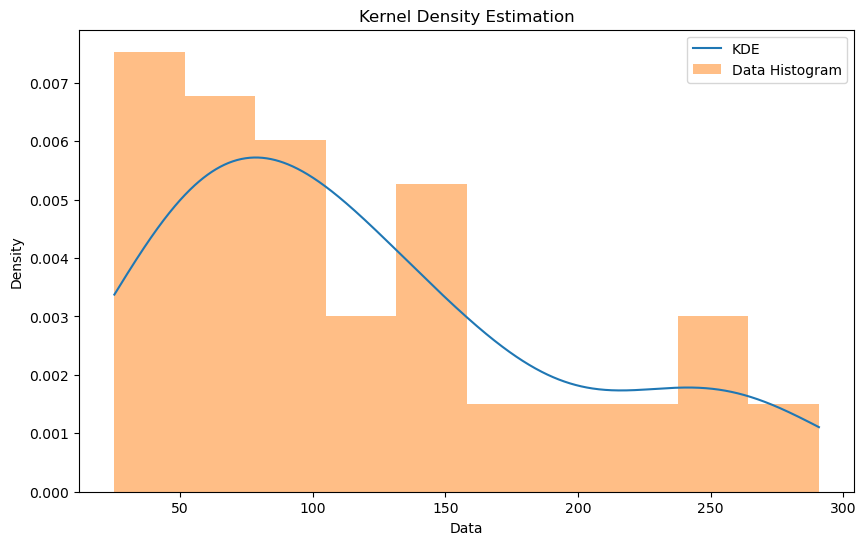

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(x_range, kde_values, label='KDE')
plt.hist(sample, bins=10, density=True, alpha=0.5, label='Data Histogram')
plt.title('Kernel Density Estimation')
plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()

In [11]:
kmeans = KMeans(n_clusters=4)
data_reshaped = sample.reshape(-1, 1)
kmeans.fit(data_reshaped)
labels = kmeans.labels_

c:\Users\bbrown\Anaconda3\envs\math\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


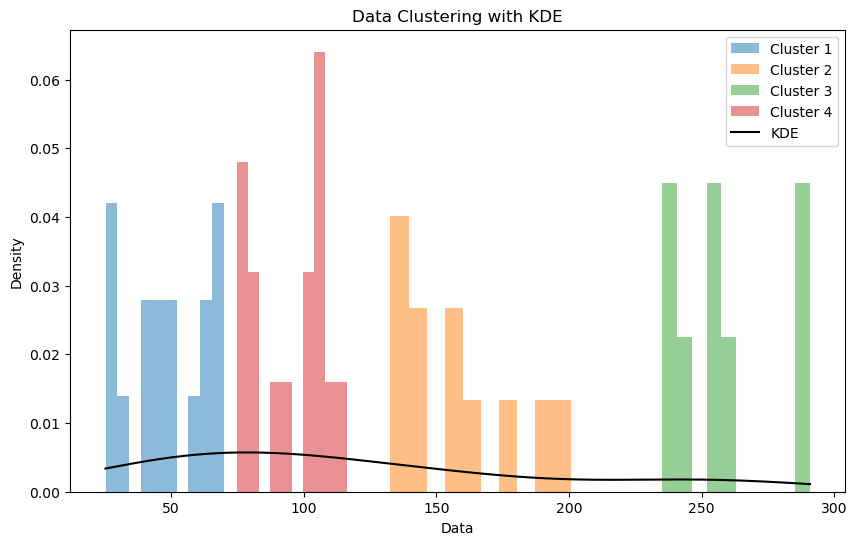

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(sample[labels == 0], bins=10, density=True, alpha=0.5, label='Cluster 1')
plt.hist(sample[labels == 1], bins=10, density=True, alpha=0.5, label='Cluster 2')
plt.hist(sample[labels == 2], bins=10, density=True, alpha=0.5, label='Cluster 3')
plt.hist(sample[labels == 3], bins=10, density=True, alpha=0.5, label='Cluster 4')
plt.plot(x_range, kde_values, label='KDE', color='black')
plt.title('Data Clustering with KDE')
plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()

In [14]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2])

In [15]:
sample

array([ 25.29255045,  25.8817371 ,  28.50617229,  32.98312806,
        39.01176101,  40.07470589,  43.99159652,  45.72181124,
        48.67935364,  49.73709075,  57.87656545,  63.03934799,
        65.20817254,  65.98273941,  68.66197247,  69.96713833,
        74.72145256,  77.42829824,  77.75057971,  80.07227165,
        80.81844294,  91.22653724,  95.30061144, 100.77825894,
       101.38431736, 104.0587903 , 104.84557459, 105.01810823,
       105.04496932, 108.38611804, 116.34748059, 132.6869597 ,
       136.26357843, 136.95384694, 143.08974527, 143.8204643 ,
       154.64640215, 155.58542388, 160.19231263, 174.9745268 ,
       190.25958103, 200.6746695 , 235.13899919, 237.31836917,
       241.96588422, 252.38220981, 252.8640172 , 261.94557924,
       287.20033209, 290.80753668])

In [16]:
labeled_data = pd.DataFrame({'Data': sample, 'Cluster': labels})
labeled_data

,Data,Cluster
0,25.292550,0
1,25.881737,0
2,28.506172,0
3,32.983128,0
4,39.011761,0
5,40.074706,0
6,43.991597,0
7,45.721811,0
8,48.679354,0
9,49.737091,0


In [ ]:
fig, ax = plt.subplots()
ax.plot(kde_values)

In [ ]:
kde_values[:20]